In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [4]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    Derivative,
    together,
    Poly,
    I
)
from sympy.core.numbers import NegativeOne, One, Zero
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Polynomials invariant under rotations

https://math.stackexchange.com/questions/3211530/invariant-polynomials-under-rotations

## Definitions
First we need to define which rotation we are considering. Therefor we fix $n\geq 0$ and define the rotation map:
$$R: \mathbb{R}^2 \rightarrow \mathbb{R},\quad R = 
\begin{pmatrix}
\cos{\left(\frac{2\pi}{n}\right)} & -\sin{\left(\frac{2\pi}{n}\right)}\\
\sin{\left(\frac{2\pi}{n}\right)} &  \cos{\left(\frac{2\pi}{n}\right)}\\
\end{pmatrix}$$

Let us now define the space of all two-variable real polynomials by $\mathbb{R}[x,y]$, and $P \in \mathbb{R}[x,y]$ as a function
$P:\mathbb{R}^2 \rightarrow \mathbb{R}$. Let now $L$ be a linear map defined such that:
$$L:\mathbb{R}[x,y] \rightarrow \mathbb{R}[x,y], \quad LP=P \circ R.$$



## Invariance under $L$
A polynomial $Q$ is then invariant when $LQ=Q$, i.e. $Q$ is an eigenvector of $L$ with eigenvalue 1. In other words we are looking for the 1-eigenspace of $L$.

Let $\mathbb{R}[x,y]_d$ be the subspace of all homogenous degree-$d$ polynomials. As an example consider:
$$\mathbb{R}[x,y]_3=\text{span}\lbrace x^3,x^2y,xy^2,y^3 \rbrace.$$

Notice that $L\left( \mathbb{R}[x,y]_d \right) \subseteq \mathbb{R}[x,y]_d$. This allows the investigation of $L$ on each degree-$d$ subspace individually, which we denote by $L_d:\mathbb{R}[x,y]_d  \rightarrow \mathbb{R}[x,y]_d$.

## Eigenvalues of $L_d$

If $\lambda,\mu$ are the eigenvalues of $R$, then the eigenvalues of $L_d$ must be:
$$\lambda^d, \lambda^{d-1}\mu,\cdots,\lambda\mu^{d-1},\mu^d.$$

You can see this by changing to the complex plane where $R$ diagonalizes, with some eigenvectors $u,v$ corresponding to $\lambda$ and $\mu$. After coordinate transforming to $(u,v)$ we have 
:
$$L(u^av^b)=\lambda^a\mu^bu^av^b,$$
etc... But we know exactly the eigenvalues of $R$: $\omega$ and $\omega^{-1}$, with $\omega=\exp{\left( \frac{2 \pi i}{n}\right)}$. A primitive nth root of unity. So the eigenvalues are 
$$\color{red}{\omega^{-d},\omega^{-d+2},\cdots, \omega^{d-2},\omega^d}.$$

The dimension of the 1-eigenspace of $L_d$ is the same as the number of eigenvalues that are equal to 1, and $\omega^i=1$ exactly when n divides i.

## Subspace of invariant polynomials for specific n of at most degree d

Let us first tabulate the eigenvalues of the operators $L_0,L_1,\cdots,L_d$.

$$
\begin{array}{l|ccccccccccc}
L_0&&&&&&\omega^0&&&&& \\
L_1&&&&&\omega^{-1}&&\omega^{1}&&&& \\
L_2&&&&\omega^{-2}&&\omega^0&&\omega^{2}&&& \\
L_3&&&\omega^{-3}&&\omega^{-1}&&\omega^{1}&&\omega^{3}&& \\
L_4&&\omega^{-4}&&\omega^{-2}&&\omega^0&&\omega^{2}&&\omega^{4}& \\
L_5&\omega^{-5}&&\omega^{-3}&&\omega^{-1}&&\omega^{1}&&\omega^{3}&& \omega^{5}
\end{array}
$$

Take now $n=3$ and $d\leq 5$, then the $\omega^i$ in the table above for which 3 divides $i$ are the answer. 

## Invariant functions 
$L_0$ is a constant function.
After that the middle column are even power of the length function $\sqrt{x^2+y^2}$, i.e. $x^2+y^2, x^4+2x^2y^2+y^4$ and so on. For the uneven powers (see further) consider $\omega^3,\omega^{-3}$ for which the functions $x^3-3xy^2,3x^2y-y^3$ are invariant.

Since
$$L(u^av^b)=\omega^{a-b}u^av^b$$ 
the condition for invariance is that $a-b$ has to be divisible by $n$.

Consider again $n=3$, then we have the two monomials $u^3,v^3$, but $u=x+iy,v=x-iy$ so one can not extract the invariant polynomials directly. But we can look at the real and imaginary part of $u^3+v^3$.

In [5]:
x,y = symbols("x y", real=True)

In [27]:
simplify(Rational(1,2)*((x-I*y)**3 + (x+I*y)**3)).expand()

In [29]:
simplify(Rational(1,2)/I*(-(x-I*y)**3 + (x+I*y)**3)).expand()

## Explicit verification invariance

For n=3 we have explicitly:
$$R=\left[\begin{matrix}-0.5 & - \frac{\sqrt{3}}{2}\\\frac{\sqrt{3}}{2} & -0.5\end{matrix}\right]
$$
So that 
$$\left[\begin{matrix}x\\y\end{matrix}\right] \rightarrow \left[\begin{matrix}- 0.5 x - \frac{\sqrt{3} y}{2}\\\frac{\sqrt{3} x}{2} - 0.5 y\end{matrix}\right]
$$

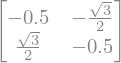

In [16]:
R = Matrix([[-1/2,-sqrt(3)/2],[sqrt(3)/2,-1/2]])

In [19]:
xpr = R * Matrix([[x],[y]])

In [32]:
print_latex(xpr)

\left[\begin{matrix}- 0.5 x - \frac{\sqrt{3} y}{2}\\\frac{\sqrt{3} x}{2} - 0.5 y\end{matrix}\right]


In [33]:
simplify(xpr[0]**3 -3 * xpr[0]*xpr[1]**2).expand()

In [34]:
simplify(xpr[1]**3 -3 * xpr[0]**2*xpr[1]).expand()

In [35]:
# eq from paper not invariant
simplify(xpr[0]**3 +3 * xpr[0]*xpr[1]**2)

In [36]:
simplify(Rational(1,2)*((x-I*y)**4 + (x+I*y)**4)).expand()

In [38]:
simplify(Rational(1,2)/I*(-(x-I*y)**4 + (x+I*y)**4)).expand()

In [45]:
simplify((x-I*y)**2+ (x+I*y)**2)